In [1]:
import sys
import importlib
sys.path.append('/home/c2032014/Polarisation_variability/')
import QPO_finder_discrete_new as qfd
importlib.reload(qfd)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det12_evt1pt5_v01_src.fits'
file2= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det3_evt1pt5_v01_src.fits'
Pmin=51
Pmax=200
gti='/home/c2032014/CYGX1/event_1pt5/GTI_ixpe01002901_evt1pt5_v01_src.txt'
bin_length=1/64
seg_length=16
fmin=1
fmax=2
mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
output_file='/home/c2032014/cygx1_paper/Observed_rms_phase_test.npy'

In [7]:
file12=file1

In [9]:
import load_and_clean as lac

In [10]:
data_3,header_3,*_=lac.load_and_clean(file2,Pmin,Pmax)
data_12,header_12,*_=lac.load_and_clean(file12,Pmin,Pmax)

In [13]:
GTI=list(np.loadtxt(gti))
from stingray import Lightcurve,AveragedCrossspectrum


In [14]:
lc_12=Lightcurve.make_lightcurve(data_12['TIME'],bin_length,gti=GTI)
lc_3=Lightcurve.make_lightcurve(data_3['TIME'],bin_length,gti=GTI)

In [15]:
Prco=AveragedCrossspectrum.from_lightcurve(lc_12,lc_3,seg_length,norm='frac')

In [16]:
delta=fmax-fmin

In [17]:
#frac_rms_tot=np.sqrt(np.sum(Prco.power.real))
#print('frac rms tot',frac_rms_tot)
frac_rms_pulse=np.sqrt( np.sum(  delta * (  Prco.power.real[(Prco.freq>=fmin)&(Prco.freq<=fmax)]  ) ) )
print('frac rms pulse',frac_rms_pulse)

frac rms pulse 0.5149366123459811


[(  2636, 1.69402263e+08, [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  92, 0.33447063, 300.0736 , 282.18808, -0.20147099,  2.07863758,  0.85664709, 1,  0.737801  , -0.08256119, -0.0989089 )
 (  2637, 1.69402263e+08, [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  73, 0.25998375, 289.3336 , 290.10208,  1.14122555,  1.56545152,  0.47006273, 1,  0.73780099,  0.03814786,  0.04981268)
 (  2638, 1.69402263e+08, [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], 173, 0.57212436, 295.8656 , 278.79108,  1.6053521 ,  1.15823085,  0.31575435, 1,  0.73786184,  0.00892338,  0.02249545)
 ...
 (141498, 1.69926652e+08, [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  56

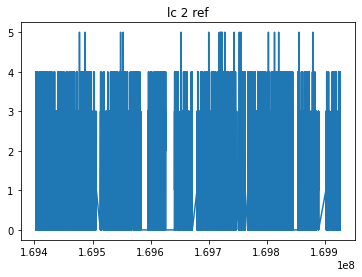

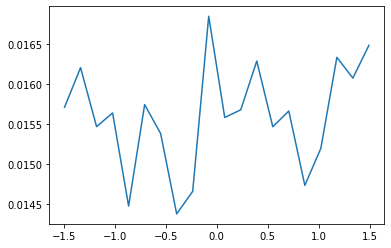

frac_rms_err_span [0.00582542 0.00579037 0.00581394 0.00579468 0.00579294 0.00578358
 0.00576746 0.00576415 0.00576513 0.00576668 0.00575035 0.00578655
 0.00575166 0.00580133 0.00579369 0.00580941 0.00580901 0.00581173
 0.00582341 0.0058024 ]
phase_err_span [0.00737028 0.007099   0.00746816 0.00736508 0.00795409 0.00730315
 0.00744791 0.00796786 0.00781498 0.00679655 0.00733319 0.00733704
 0.00701616 0.00744188 0.00734532 0.00783727 0.00759665 0.00706922
 0.00720109 0.00699099]
av_mod: [-1.49225651 -1.33517688 -1.17809725 -1.02101761 -0.86393798 -0.70685835
 -0.54977871 -0.39269908 -0.23561945 -0.07853982  0.07853982  0.23561945
  0.39269908  0.54977871  0.70685835  0.86393798  1.02101761  1.17809725
  1.33517688  1.49225651]
[-1.49225651 -1.33517688 -1.17809725 -1.02101761 -0.86393798 -0.70685835
 -0.54977871 -0.39269908 -0.23561945 -0.07853982  0.07853982  0.23561945
  0.39269908  0.54977871  0.70685835  0.86393798  1.02101761  1.17809725
  1.33517688  1.49225651]
20
20
reduced chi s

In [3]:
results=qfd.qpo_finder_discrete(file1,file2,Pmin,Pmax,gti,bin_length,seg_length,mod_min,mod_max,mod_bin_number,
                       fmin,fmax,output_file,coherence_corrector=False,spur_sub=True)


0.5134716742396144, 0.7938776104583137, 0.20612238954168627, 0.26127867497339174

In [4]:
results=np.load(output_file,allow_pickle=True)
results=np.transpose(results)

In [5]:
av_mod=results[0]
av_mod_err=results[1]
frac_rms_span=results[2]
frac_rms_err_span=results[3]
phase_span=results[4]
phase_err_span=results[5]
fit_y_line_fracrms=results[6]
fit_y_line_phase=results[7]
fit_y_sin90_fracrms=results[8]
fit_y_sin90_phase=results[9]
fit_y_sin180_fracrms=results[10]
fit_y_sin180_phase=results[11]
fit_y_sinsum_fracrms=results[12]
fit_y_sinsum_phase=results[13]

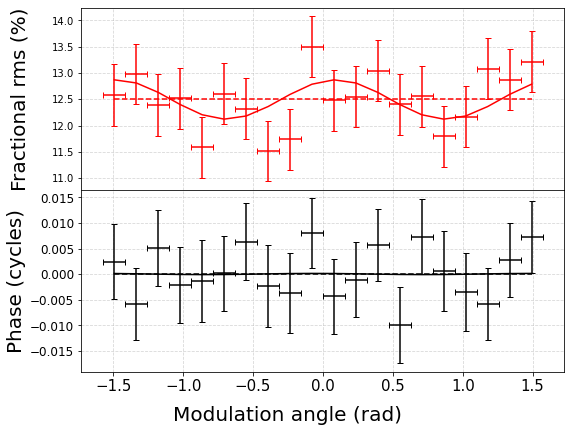

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming av_mod, frac_rms_span, frac_rms_err_span, av_mod_err, phase_span, phase_err_span are already defined

# Create the figure and subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'hspace': 0})
#ax1.set_title( size=20)
# Plot data on each subplot
ax1.errorbar(av_mod, frac_rms_span * 100, yerr=frac_rms_err_span * 100, xerr=av_mod_err, ls='none',capsize=3, color='red',label='Observed')
ax1.set_ylabel('Fractional rms (%)', size=20, labelpad=23)

#ax1.plot(av_mod,rms_pcos_analytic*100, color='green',ls='--',label='rmspco')
#ax1.plot(av_mod,rms_analytic*149, color='blue',ls='--',label='Analytic')
ax1.plot(av_mod,fit_y_sin90_fracrms*100, color='red',ls='-',label='fit')
ax1.plot(av_mod,fit_y_line_fracrms*100, color='red',ls='--',label='fitnull')
#ax1.plot(av_mod,[i*100 for i in herx1_analytic_rms], color='blue',ls='--',label='Analytic')

#ax1.plot(av_mod,frac_rms_span_sim*100, color='red',ls='--',label='Simulated')
#ax1.legend()


ax2.errorbar(av_mod, phase_span, xerr=av_mod_err, yerr=phase_err_span, color='black', ls='none',capsize=3,label='Observed')

ax2.set_ylabel('Phase (cycles)', size=20)
#ax2.plot(av_mod,herx1_analytic_phase, color='blue',ls='--',label='Analytic')

#av_phase_err=np.array(av_phase_err)

#ax2.plot(av_mod,phase_analytic/(2*np.pi), ls='--',color='blue',label='Analytic')
ax2.plot(av_mod,fit_y_sin90_phase/(2*np.pi), ls='-',color='black',label='fit')
ax2.plot(av_mod,fit_y_line_phase/(2*np.pi), ls='--',color='black',label='fitnull')
#ax2.plot(av_mod,phase_span_sim/(2*np.pi), color='red',ls='--',label='Simulated')
#ax2.errorbar(av_mod,phase_span_sim/(2*np.pi), xerr=av_mod_err,yerr=phase_err_span_sim/(2*np.pi) ,ls='none',color='red',label='Simulated')
#ax2.plot(av_mod,phase_span_sim/(2*np.pi), color='red',ls='--',label='Simulated')
fig.supxlabel('Modulation angle (rad)', size=20)

#y_major_ticks_ax1 = np.linspace(42,50, 5)  
#y_major_ticks_ax2 = np.linspace(-0.008, 0.004, 4)

#ax1.set_yticks(y_major_ticks_ax1)
#x2.set_yticks(y_major_ticks_ax2)

# Set minor ticks with smaller intervals
y_minor_ticks_ax1 = np.linspace(43, 49,4)  # Minor ticks (e.g., 21 ticks for finer granularity)
y_minor_ticks_ax2 = np.linspace(-0.006, 0.002, 3)    # Minor ticks for the second plot

#ax1.set_yticks(y_minor_ticks_ax1, minor=True)
#ax2.set_yticks(y_minor_ticks_ax2, minor=True)

# Customize tick parameters
#ax1.tick_params(axis='both', direction='in', top=True, size=5, which='both')
#ax2.tick_params(axis='both', direction='in', top=True, size=5, which='both')

ax1.grid(which='both', linestyle='--', alpha=0.5)
ax2.grid(which='both', linestyle='--', alpha=0.5)

#def format_tick_label(y, pos):
#    return f"{y/10000:.0f}e3"

#def format_tick_label_her(y, pos):
#    return f"{y/100:0.0f}e3"


# Adjust the y-tick labels' font size specifically (if needed)
#ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)  # You can adjust this to the font size you prefer
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12) 
#plt.legend()
plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
#plt.savefig('/home/c2032014/Pulsar_paper/Her_X1/Observed_rms_phase_FINAL.png', dpi=300, bbox_inches='tight')
plt.show()


Now to test the absolute rms variability function!

In [2]:
import sys
sys.path.append('/home/c2032014/Polarisation_variability/')
import QPO_finder_abs as qfa

SyntaxError: positional argument follows keyword argument (dG_calc_abs.py, line 11)